# Dimensionality reduction techniques

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
from prince import MCA

In [1]:
data_path = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/ML_Vestiaire_Collective/backup"

In [8]:
data = pd.read_pickle(data_path+"/vc_data_cleaned.pkl")

In [9]:
data.head()

,num_likes,price,we_love_tag,gender,category,sub_category,designer,condition,material,color,size,location,lprice
id,,,,,,,,,,,,,
19126896,7,180.00,1,women,shoes,boots,cheap_brand,very_good_condition,leather,black,size_39,eu,5.198497
19181389,1,40.55,1,women,clothing,jeans,cheap_brand,good_condition,denim_jeans,navy,size_m,eu,3.726898
19182029,6,332.50,1,men,clothing,coats,cheap_brand,good_condition,wool,black,size_l,eu,5.809643
19132670,3,45.00,0,men,clothing,jeans,cheap_brand,never_worn,cotton,grey,size_m,eu,3.828641
19118182,9,105.00,0,women,clothing,dresses,cheap_brand,very_good_condition,other_material,black,size_s,eu,4.663439


In [15]:
X = data.drop(
    labels=["num_likes" ,"price", "lprice"], 
    axis=1
).values

In [11]:
help(MCA)

Help on class MCA in module prince.mca:

class MCA(prince.ca.CA)
 |  MCA(n_components=2, n_iter=10, copy=True, check_input=True, benzecri=False, random_state=None, engine='auto')
 |  
 |  Method resolution order:
 |      MCA
 |      prince.ca.CA
 |      sklearn.base.BaseEstimator
 |      sklearn.base.TransformerMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  column_coordinates(self, X)
 |      The column principal coordinates.
 |  
 |  fit(self, X, y=None)
 |  
 |  plot_coordinates(self, X, ax=None, figsize=(6, 6), x_component=0, y_component=1, show_row_points=True, row_points_size=10, row_points_alpha=0.6, show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, legend_n_cols=1)
 |      Plot row and column principal coordinates.
 |      
 |      Parameters:
 |          ax (matplotlib.Axis): A fresh one will be created and returned if not provided.
 |          figsize ((float, float)): The desired figure size if `ax` is not 

In [51]:
n_categories = np.sum( [
    len( set(X[:, i]) )
    for i in range(X.shape[1])
] )

In [52]:
mca = MCA(n_components=n_categories)

In [53]:
mca.fit(X)

MCA(n_components=99)

In [71]:
inertia_cum = np.cumsum(mca.explained_inertia_)
pcs = [i for i in range(len(inertia_cum))]
results = {
    pc: val 
    for pc, val in zip(pcs, inertia_cum)
}
results

{0: 0.04587328515296999,
 1: 0.08342292944273094,
 2: 0.1125005558614931,
 3: 0.13587197693158604,
 4: 0.15681929497740152,
 5: 0.17608043986581373,
 6: 0.1946186731284248,
 7: 0.21228910447018534,
 8: 0.22906035331201846,
 9: 0.24541080146818076,
 10: 0.2614259515591757,
 11: 0.27691720334320247,
 12: 0.29224632193946953,
 13: 0.3069909765367274,
 14: 0.3210494480942477,
 15: 0.3347919169212167,
 16: 0.3483719740734467,
 17: 0.3617450113899352,
 18: 0.374851715263818,
 19: 0.387920525348121,
 20: 0.40094807106288727,
 21: 0.4137718315113494,
 22: 0.4265431514161958,
 23: 0.43914834360542676,
 24: 0.45165047202019504,
 25: 0.46414930801047016,
 26: 0.47653310441315155,
 27: 0.4888813756124211,
 28: 0.5011395709128103,
 29: 0.5132903427103396,
 30: 0.5254236880832058,
 31: 0.5375079505502698,
 32: 0.5494973930762416,
 33: 0.5614654453735771,
 34: 0.5734036694560481,
 35: 0.5852233096210189,
 36: 0.5969880416981331,
 37: 0.6087220524491217,
 38: 0.6204316743354863,
 39: 0.632093710080179

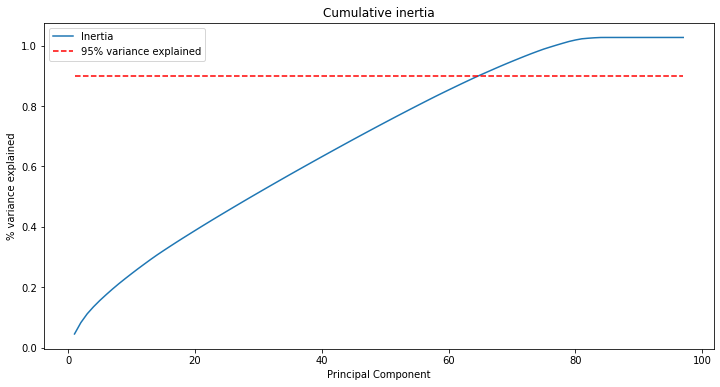

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    [i for i in range(1, 98)], 
    inertia_cum, 
    label="Inertia"
)
ax.plot(
    [i for i in range(1, 98)], 
    [.9 for _ in range(1, 98)], 
    color="red", 
    linestyle="dashed", 
    label="95% variance explained"
)
ax.set_xlabel("Principal Component")
ax.set_ylabel("% variance explained")
ax.set_title("Cumulative inertia")
ax.legend(); 